In [39]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [17]:
abbrTrain = 'E:\python_project\happinessPredict\DataSet\happiness_train_abbr.csv'
data = pd.read_csv(abbrTrain)

abbrTest = 'E:\python_project\happinessPredict\DataSet\happiness_test_abbr.csv'
testData = pd.read_csv(abbrTest)

data.keys()
# print(data)


Index(['id', 'happiness', 'survey_type', 'province', 'city', 'county',
       'survey_time', 'gender', 'birth', 'nationality', 'religion',
       'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability'],
      dtype='object')

In [18]:
data.dtypes.sort_values()

id                   int64
view                 int64
hukou                int64
socialize            int64
relax                int64
learn                int64
equity               int64
class                int64
work_exper           int64
family_m             int64
family_status        int64
house                int64
car                  int64
marital              int64
status_peer          int64
status_3_before      int64
health_problem       int64
health               int64
depression           int64
height_cm            int64
happiness            int64
survey_type          int64
province             int64
city                 int64
county               int64
gender               int64
weight_jin           int64
inc_ability          int64
nationality          int64
religion             int64
religion_freq        int64
edu                  int64
income               int64
political            int64
birth                int64
work_status        float64
work_yr            float64
w

In [19]:
data.isnull().sum()[data.isnull().sum()>0]

work_status      5049
work_yr          5049
work_type        5049
work_manage      5049
family_income       1
dtype: int64

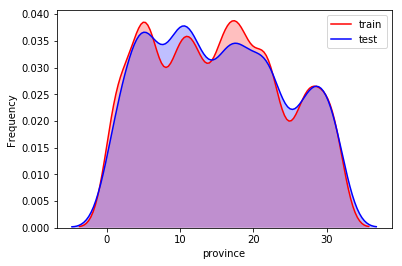

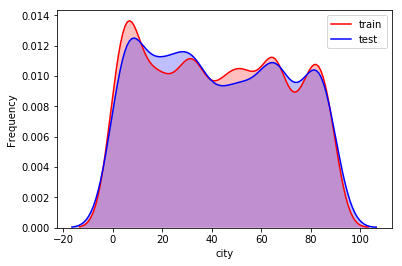

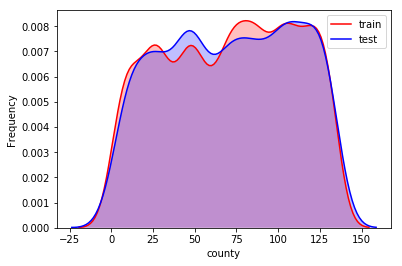

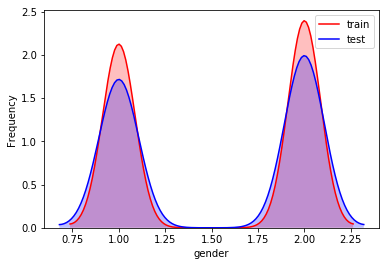

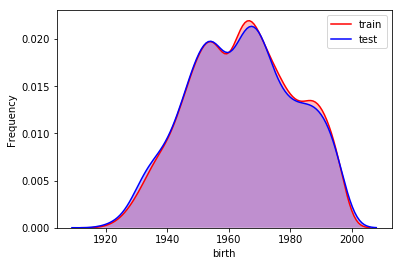

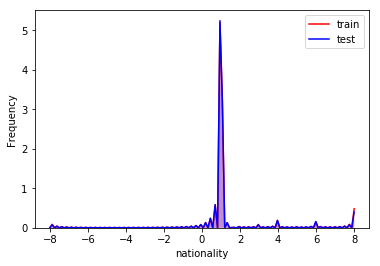

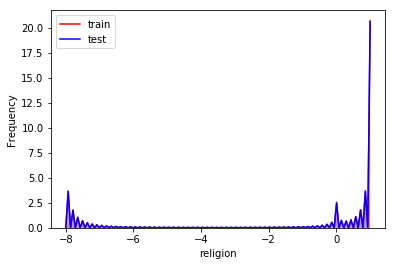

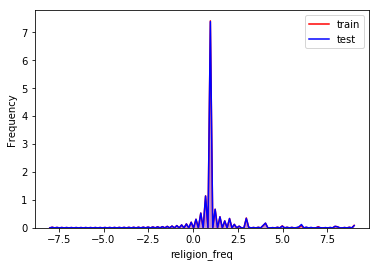

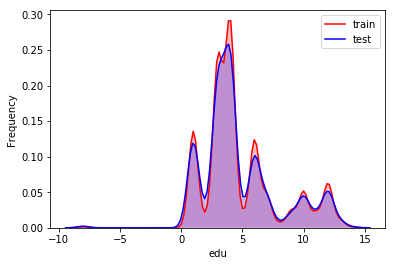

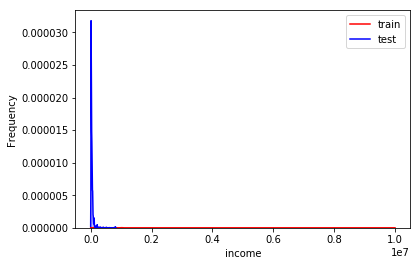

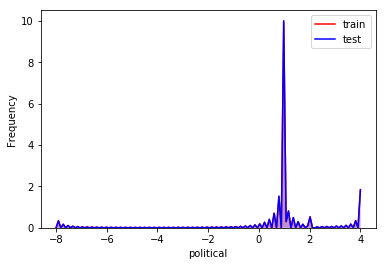

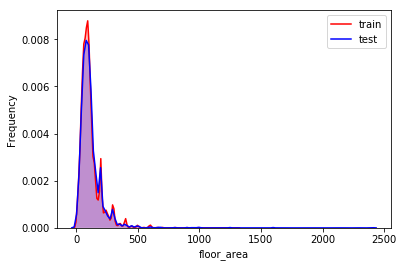

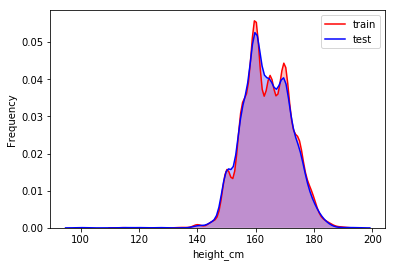

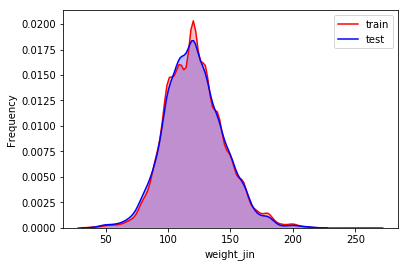

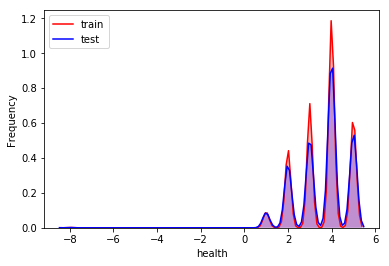

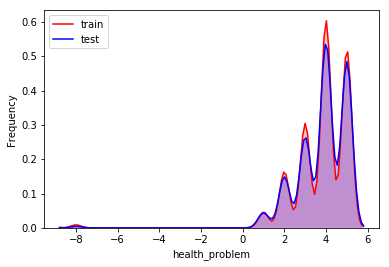

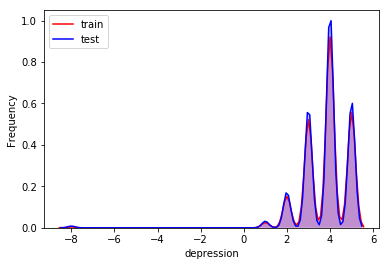

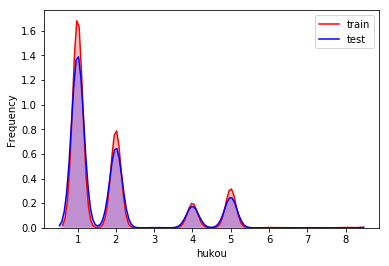

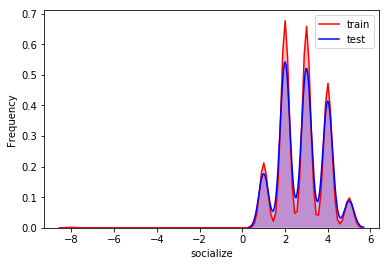

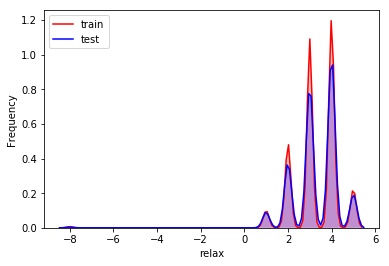

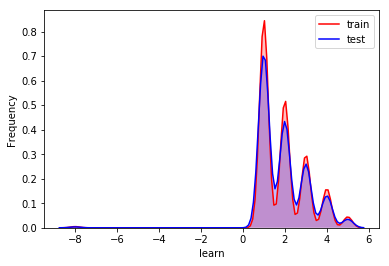

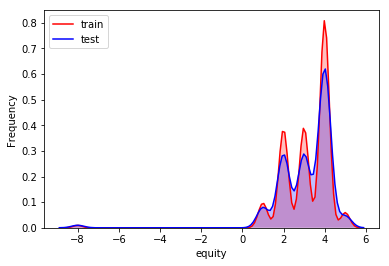

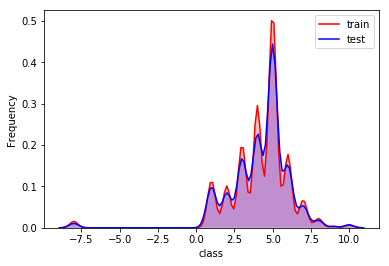

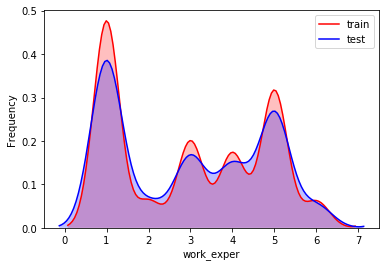

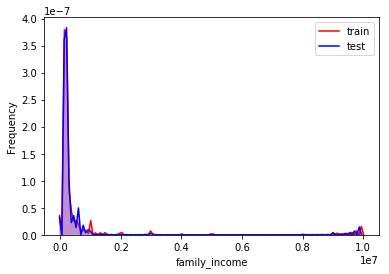

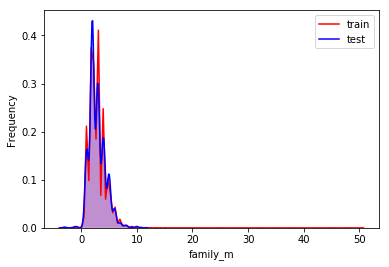

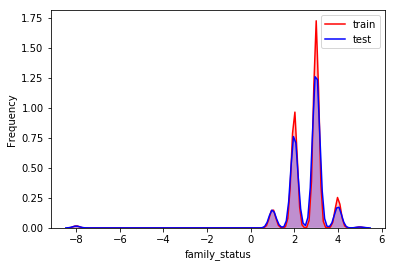

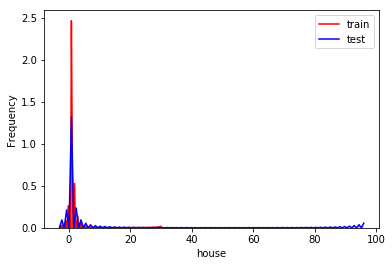

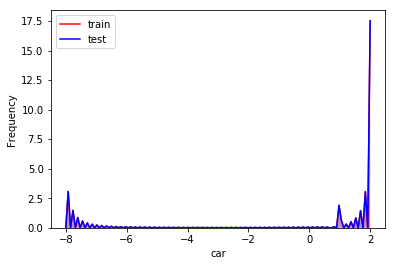

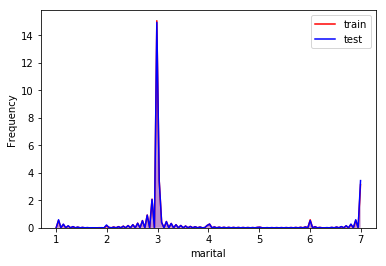

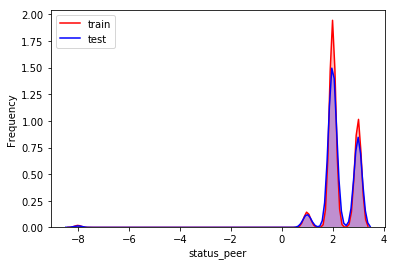

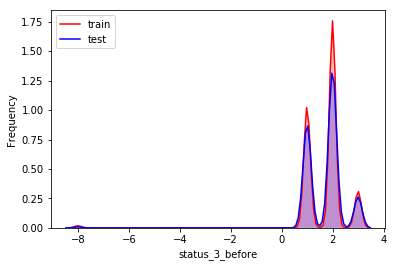

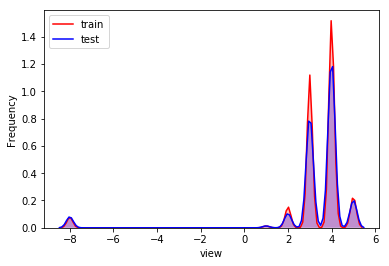

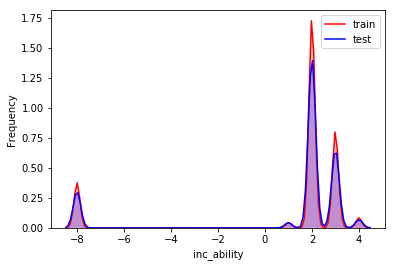

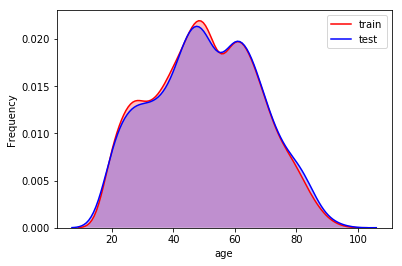

In [20]:
"""
Explore feature distibution 
"""

data['age'] = 2015 - data.birth
testData['age'] = 2015 - testData.birth

keys = ['province', 'city', 'county',
        'gender', 'birth', 'nationality', 'religion',
        'religion_freq', 'edu', 'income', 'political', 'floor_area',
        'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
        'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
        'family_income', 'family_m', 'family_status', 'house', 'car', 'marital',
        'status_peer', 'status_3_before', 'view', 'inc_ability', 'age']

preData = data[keys]
preTestData = testData[keys]

for column in keys:
    g = sns.kdeplot(preData[column], color="Red", shade = True)
    g = sns.kdeplot(preTestData[column], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

In [24]:
"""
随机森林
"""

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier



keys = ['province', 'city', 'county', 'gender', 'birth', 'nationality',
        'religion', 'religion_freq', 'edu', 'income', 'political', 'floor_area',
        'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
        'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'family_m',
        'family_status', 'house', 'car', 'marital', 'status_peer',
        'status_3_before', 'view', 'inc_ability']

preData = data[keys]
preTestData = testData[keys]

preData = preData.fillna(preData.median())

x_train, x_test, y_train, y_test = train_test_split(preData, data.happiness, test_size=0.33, random_state=4)
RF_classifier = RandomForestRegressor()
RF_regressor = RandomForestRegressor()

RF_classifier.fit(x_train, y_train)
RF_regressor.fit(x_train, y_train)

RF_classicierPrediction = RF_classifier.predict(x_test)
RF_regressorPrediction = RF_regressor.predict(x_test)

MSE_classifier = mean_squared_error(y_true=y_test, y_pred=RF_classicierPrediction)
MSE_regressor = mean_squared_error(y_true=y_test, y_pred=RF_regressorPrediction)

print(MSE_classifier)
print(MSE_regressor)

0.6217196969696969
0.6046856060606061


In [26]:
"""
SVM
"""
from sklearn.svm import SVC, SVR

SVM_classifier = RandomForestRegressor()
SVM_regressor = RandomForestRegressor()

SVM_classifier.fit(x_train, y_train)
SVM_regressor.fit(x_train, y_train)

SVM_classicierPrediction = SVM_classifier.predict(x_test)
SVM_regressorPrediction = SVM_regressor.predict(x_test)

MSE_classifier = mean_squared_error(y_true=y_test, y_pred=SVM_classicierPrediction)
MSE_regressor = mean_squared_error(y_true=y_test, y_pred=SVM_regressorPrediction)

print(MSE_classifier)
print(MSE_regressor)


0.6161249999999999
0.6282386363636364


D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

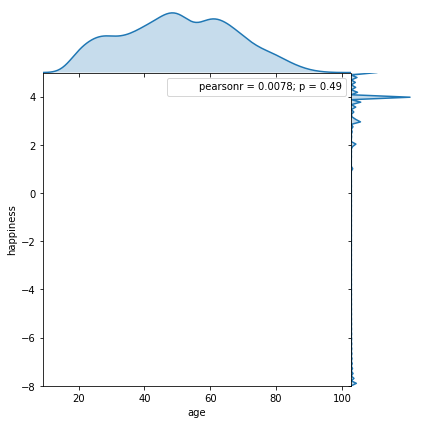

In [7]:
# plt.figure()
# sns.jointplot(data.age, label, kind='kde', height=7, space=0)
# plt.show()

In [23]:
# sns.distplot(data.age, color="g")
# plt.show()
# sns.distplot(data.health, color="g")
# plt.show()
# sns.distplot(data.depression, color="g")
# plt.show()
# sns.distplot(data['class'], color="g")
# plt.show()

In [9]:
data.age.mean()

50.292375

In [4]:
# 使用统计平均值
data.pivot_table('happiness', index='depression', columns='family_status')

family_status,-8,1,2,3,4,5
depression,,,,,,
-8,-8.000000,2.000000,2.800000,3.833333,NaN,NaN
1,NaN,2.218750,2.545455,3.458333,3.500000,NaN
2,3.000000,2.558824,3.166667,3.579787,3.937500,4.5
3,2.545455,3.016393,3.468170,3.846070,3.962617,4.0
4,2.900000,3.600000,3.750000,4.018462,4.197015,4.5
5,4.352941,3.779412,3.964349,4.185870,4.331683,4.5


In [36]:
data.pivot_table('happiness', index='health', columns='health_problem')

health_problem,-8,1,2,3,4,5
health,,,,,,
-8,-8.000000,NaN,NaN,3.000000,3.000000,1.000000
1,3.333333,2.972477,3.284211,3.705882,3.375000,4.071429
2,3.166667,3.436782,3.547529,3.610354,3.703390,3.637681
3,3.600000,3.761905,3.804511,3.687126,3.764388,3.844920
4,3.750000,3.875000,3.923077,3.832418,3.929651,3.959333
5,4.000000,4.000000,3.833333,4.108696,4.042226,4.138298


In [153]:
# print(data.pivot_table('happiness', index='edu'))
# print(data.pivot_table('happiness', index='class'))
# print(data.pivot_table('happiness', index='equity'))
# print(data.pivot_table('happiness', index='view'))
# print(data.pivot_table('happiness', index='health'))
data.pivot_table('happiness', index='weight_jin', columns='gender')

gender,1,2
weight_jin,,
40,NaN,3.800000
42,NaN,4.000000
48,NaN,3.500000
50,4.000000,3.714286
51,NaN,3.500000
52,NaN,4.000000
53,NaN,4.000000
55,3.500000,4.333333
56,NaN,4.000000


In [6]:
data.pivot_table('happiness', index='depression')

,happiness
depression,
-8,1.687500
1,2.692308
2,3.220217
3,3.643864
4,3.943508
5,4.128243


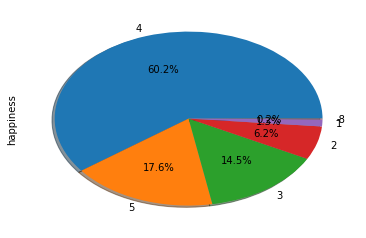

In [7]:
data.happiness.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.show()

D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\SoftWare\Anaconda3-5.2.0\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)


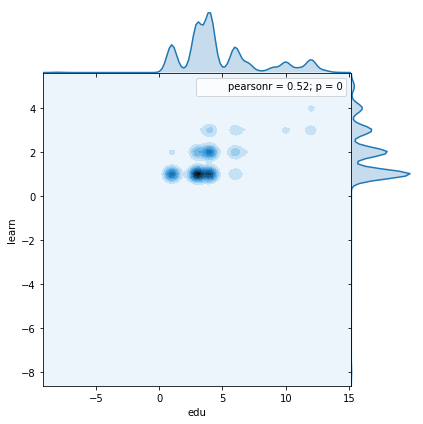

In [52]:
sns.jointplot(data.edu.fillna(data.edu.mean),
              data.learn.fillna(data.learn.mean),
              kind='kde', space=0, height=7)
plt.show()

Index(['id', 'happiness', 'survey_type', 'province', 'city', 'county',
       'survey_time', 'gender', 'birth', 'nationality', 'religion',
       'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability', 'age'],
      dtype='object')


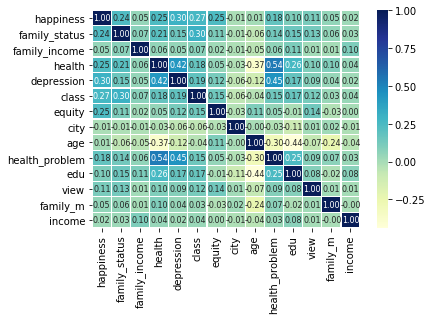

In [15]:
print(data.keys())
selected = ['happiness', 'family_status', 'family_income', 'health', 'depression',
            'class', 'equity', 'city', 'age', 'health_problem', 'edu', 'view',
           'family_m', 'income']
selectedFeature = data[selected]

annot_kws = {'size': 8}
sns.heatmap(selectedFeature.corr(),
            cmap='YlGnBu',
            linewidths=0.2,
            annot=True,
            annot_kws=annot_kws,
            fmt='.2f')
plt.show()

In [16]:
# family_income 特征不号？？？需要和其他特征组合使用可能？？
data.family_income = data.family_income.fillna(data.family_income.mean())
data.family_income.isna().sum()

0

In [19]:
# x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.33,
#                                                     random_state=4)
# # 标准化有一定的提升
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# regressor = xgb.XGBRegressor(subsample=0.9, colsample_bytree=0.8)
# learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
# seed = [i for i in range(20)]
# param_grid = dict(learning_rate=learning_rate, seed=seed)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(regressor, param_grid, n_jobs=-1, cv=kfold)

# newFeature = ['family_status', 'health', 'depression',
#               'class', 'equity', 'health_problem', 'city',
#               'province', 'view']
# feature = data[newFeature]
# grid_result = grid_search.fit(x_train_scaled, y_train)

In [20]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.225491 using {'learning_rate': 0.1, 'seed': 0}


work_status      5049
work_yr          5049
work_type        5049
work_manage      5049
family_income       1
dtype: int64
4    4818
5    1410
3    1171
2     497
1     104
Name: happiness, dtype: int64
4    4818
5    1410
3    1171
2     497
1     104
Name: happiness, dtype: int64


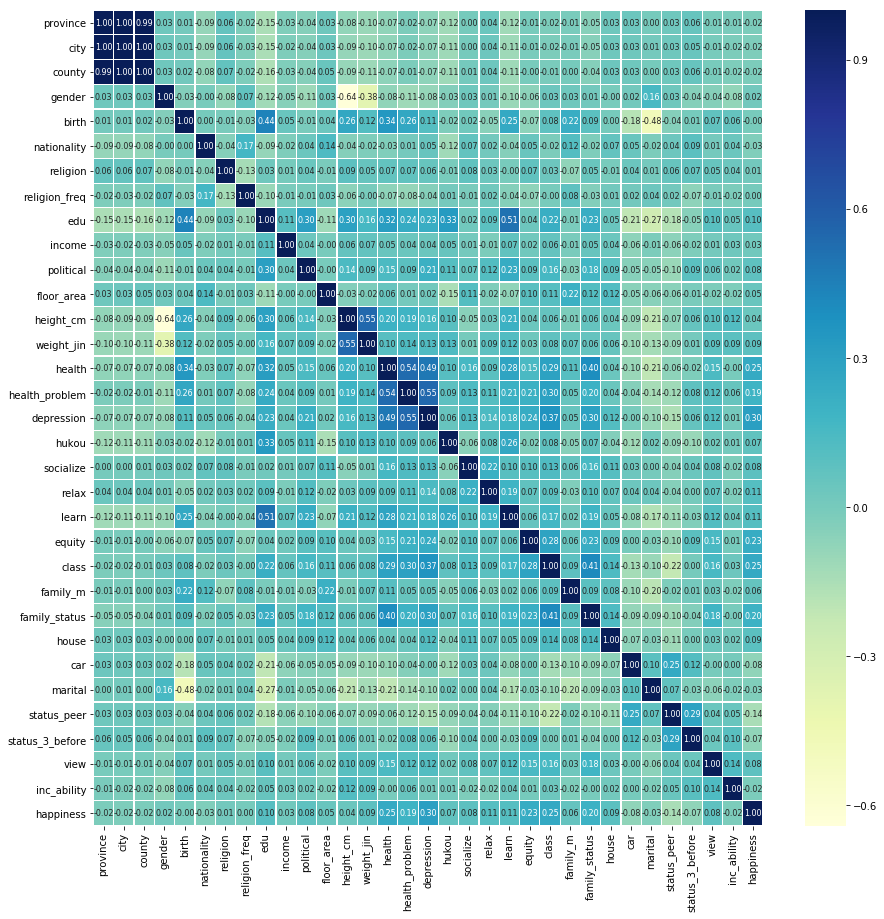

In [78]:
print(data.isnull().sum()[data.isnull().sum() > 0])
keys = ['province', 'city', 'county', 'gender', 'birth', 'nationality',
        'religion', 'religion_freq', 'edu', 'income', 'political', 'floor_area',
        'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
        'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'family_m',
        'family_status', 'house', 'car', 'marital', 'status_peer',
        'status_3_before', 'view', 'inc_ability']
label = data.happiness
print(label.value_counts())
for i in range(len(label)):
    if label[i] == -8:
        label[i] = label.mean()
print(label.value_counts())

# smote 采样不平衡样本集,生成的数据是numpy数组
smote = SMOTE(random_state=0)
# adasyn = ADASYN(random_state=0)
pre_smote_data = data[keys]
x_resample, y_resample = smote.fit_sample(pre_smote_data, label)
# 将数据转换为数据框并命名列名
x_smote_resample = pd.DataFrame(x_resample, columns=keys) 
# 将数据转换为数据框并命名列名
y_smote_resample = pd.DataFrame(y_resample, columns=['hapinness']) 

x_smote_resample['happiness'] = label
plt.figure(figsize=(15, 15))
annot_kws = {'size': 8}
sns.heatmap(x_smote_resample.corr(),
            cmap='YlGnBu',
            linewidths=0.2,
            annot=True,
            annot_kws=annot_kws,
            fmt='.2f')
plt.show()

In [72]:
print(data.isnull().sum()[data.isnull().sum() > 0])
keys = ['province', 'city', 'county', 'gender', 'birth', 'nationality',
        'religion', 'religion_freq', 'edu', 'income', 'political', 'floor_area',
        'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
        'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'family_m',
        'family_status', 'house', 'car', 'marital', 'status_peer',
        'status_3_before', 'view', 'inc_ability']
label = data.happiness
print(label.value_counts())
for i in range(len(label)):
    if label[i] == -8:
        label[i] = label.mean()
print(label.value_counts())

# smote 采样不平衡样本集,生成的数据是numpy数组
smote = SMOTE(random_state=0)
# adasyn = ADASYN(random_state=0)
x_resample, y_resample = smote.fit_sample(data[keys], label)
# 将数据转换为数据框并命名列名
x_smote_resample = pd.DataFrame(x_resample, columns=keys) 
# 将数据转换为数据框并命名列名
y_smote_resample = pd.DataFrame(y_resample, columns=['hapinness']) 
x_train, x_test, y_train, y_test = train_test_split(x_smote_resample, y_smote_resample,
                                                    test_size=0.33, random_state=4)
# # 标准化有一定的提升
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)


regressor = xgb.XGBRegressor(subsample=0.9, colsample_bytree=0.8, seed=0)


regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
print(mean_squared_error(y_pred=prediction, y_true=y_test))


work_status      5049
work_yr          5049
work_type        5049
work_manage      5049
family_income       1
dtype: int64
4    4818
5    1410
3    1171
2     497
1     104
Name: happiness, dtype: int64
4    4818
5    1410
3    1171
2     497
1     104
Name: happiness, dtype: int64
0.5881583087116194


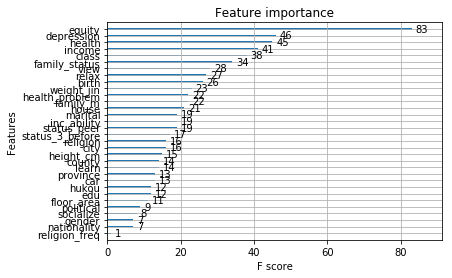

In [73]:
xgb.plot_importance(regressor)
plt.show()

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64
0.645556416753925
0.5382956518490596
[4.609377  3.8208961 3.9259684 ... 4.487161  2.4413009 4.3639755]


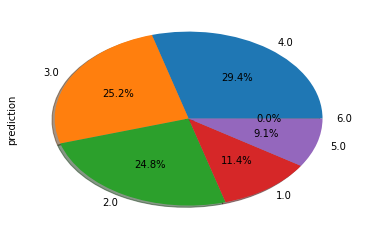

In [41]:
abbrTrain = 'E:\python_project\happinessPredict\DataSet\happiness_train_abbr.csv'
data = pd.read_csv(abbrTrain)

# newFeature = ['equity', 'depression', 'health',
#               'income', 'class', 'family_status', 'family_income',
#               'view', 'relax', 'birth',
#               'city', 'province',
#               'weight_jin', 'gender']
newFeature = ['equity', 'depression', 'health',
              'income', 'class', 'family_status', 'family_income',
              'view', 'relax', 'birth',
              'city', 
              'gender', 'weight_jin', 'edu']

label = data.happiness
print(label.value_counts())
for i in range(len(label)):
    if label[i] == -8:
        label[i] = label.mean()
# 用中位数填充 family_income 的 null 值
feature = data[newFeature]
feature.family_income = feature.family_income.fillna(feature.family_income.median())
# 
# smote 采样不平衡样本集       感觉效果没有很大啊？？？
# 

smote = SMOTE(random_state=4)
x_resample, y_resample = smote.fit_sample(feature, label)

# un_sampling = RandomUnderSampler(random_state=4)
# x_resample, y_resample = un_sampling.fit_sample(feature, label)

# 将数据转换为数据框并命名列名
x_smote_resample = pd.DataFrame(x_resample, columns=newFeature) 
# 将数据转换为数据框并命名列名
y_smote_resample = pd.DataFrame(y_resample, columns=['hapinness']) 
x_train, x_test, y_train, y_test = train_test_split(x_smote_resample, y_smote_resample,
                                                    test_size=0.33, random_state=4)
# # 标准化有一定的提升
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)


regressor = xgb.XGBRegressor(subsample=0.9, colsample_bytree=0.8, seed=0)


regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
print(mean_squared_error(y_pred=prediction, y_true=y_test))

print(mean_squared_error(y_pred=regressor.predict(feature), y_true=label))
print(prediction)

roundTest = [round(prediction[i]) for i in range(len(prediction))]
roundTest = pd.DataFrame(roundTest, columns=['prediction'])
roundTest.prediction.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.show()

In [128]:
"""
提交版
"""
abbrTrain = 'E:\python_project\happinessPredict\DataSet\happiness_train_abbr.csv'
data = pd.read_csv(abbrTrain)
# 这一组特征不进行SMOTE的MSE为 0.4791050309558717
# newFeature = ['equity', 'depression', 'health', 'income', 'class', 'family_status',
#               'view', 'relax', 'birth', 'city', 'family_income', 'province',
#               'weight_jin', 'gender']
newFeature = ['equity', 'depression', 'health',
              'income', 'class', 'family_status', 'family_income',
              'view', 'relax', 'birth',
              'city', 'province',
              'gender', 'weight_jin', 'edu']
label = data.happiness
# label极端值用中位数填充
for i in range(len(label)):
    if label[i] == -8:
        label[i] = label.median()

feature = data[newFeature]

feature['bmi'] = (data.weight_jin / 2) / ((data.height_cm / 100) ** 2)
# feature.family_income缺失值填入中位数
feature['family_income'] = feature.family_income.fillna(feature.family_income.median())

x_train, x_test, y_train, y_test = train_test_split(feature, label,
                                                    test_size=0.3, random_state=48)
# 标准化有一定的提升
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 将数据转换为数据框并命名列名
x_train = pd.DataFrame(x_train_scaled, columns=feature.keys())
x_test = pd.DataFrame(x_test_scaled, columns=feature.keys()) 

regressor = xgb.XGBRegressor(subsample=0.9, colsample_bytree=0.8, seed=4)

regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
print('mse = ', mean_squared_error(y_pred=prediction, y_true=y_test))
print(prediction)
print(feature.keys())

mse =  0.4473599870423781
[3.322219  3.9001749 3.882701  ... 4.0134044 3.7650454 3.24426  ]
Index(['equity', 'depression', 'health', 'income', 'class', 'family_status',
       'family_income', 'view', 'relax', 'birth', 'city', 'province', 'gender',
       'weight_jin', 'edu', 'bmi'],
      dtype='object')


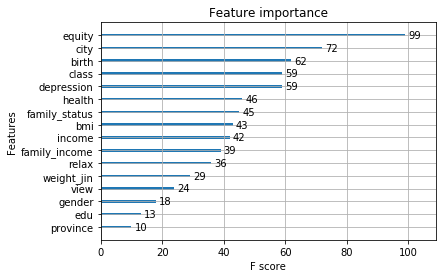

In [129]:
xgb.plot_importance(regressor)
plt.show()

In [130]:
abbrTest = 'E:\python_project\happinessPredict\DataSet\happiness_test_abbr.csv'
testData = pd.read_csv(abbrTest)

testFeature = testData[newFeature]

testFeature['bmi'] = (testData.weight_jin / 2) / ((testData.height_cm / 100) ** 2)
# feature.family_income缺失值填入中位数
testFeature['family_income'] = testFeature.family_income.fillna(testFeature.family_income.median())

test = scaler.transform(testFeature)
# 将数据转换为数据框并命名列名
test = pd.DataFrame(test, columns=testFeature.keys())

testPrediction = regressor.predict(test)

print(testPrediction)

[3.7335787 2.6547308 3.4228344 ... 4.0514164 3.8446145 4.732956 ]


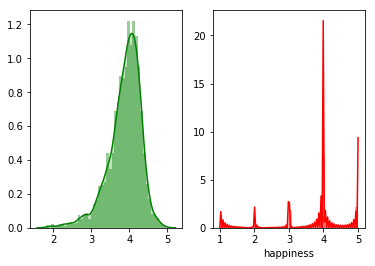

In [131]:
predictionFram = pd.DataFrame(testPrediction, columns=['happiness'])
plt.subplot(121)
g = sns.distplot(predictionFram, color='g', kde_kws={"shade": True})
plt.subplot(122)
g = sns.distplot(label, color='r', kde_kws={"shade": True})
plt.show()

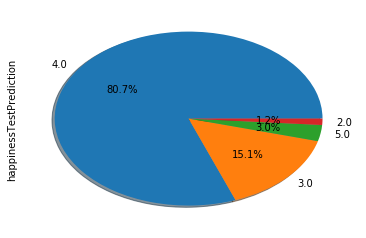

In [132]:
# testPrediction.happiness
roundTest = [round(testPrediction[i]) for i in range(len(testPrediction))]
roundTest = pd.DataFrame(roundTest, columns=['happinessTestPrediction'])
roundTest.happinessTestPrediction.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.show()

In [50]:
# z_scope_x_train = x_train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# z_scope_x_test = x_test.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# data.keys()
testPrediction

array([3.7530274, 2.9089525, 3.1352587, ..., 4.06502  , 3.7395458,
       4.772087 ], dtype=float32)

In [133]:
import csv
with open('E:\python_project\happinessPredict\submit2.csv', 'w', newline='') as csvFile:
    fileNames = ['id', 'happiness']
    writer = csv.DictWriter(csvFile, fieldnames=fileNames)
    writer.writeheader()
    for i in range(len(testPrediction)):
        dictionary = {'id': i+8001, 'happiness': testPrediction[i]}
        writer.writerow(dictionary)

In [134]:
testPrediction = pd.read_csv('E:\python_project\happinessPredict\submit2.csv')
testPrediction.shape

(2968, 2)

In [135]:
# testPrediction.happiness.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
# plt.show()